# Heart Disease Prediction with a Machine Learning/Deep Learning Models

Summary:

This notebook utilizes multiple Python-based machine learning libraries, in combination with a patient's medical attributes, to create a machine learning model for predicting heart disease.  I was able to achieve an accuracy of close to 85% with logistic regression that was cross-validated. A simple deep learning model -- as a quick sanity check -- was also employed to obtain an accuracy of 85%. The sex (being male), Thalassemia diagnosis, and the outcome of fluoroscopy characterization are the biggest predictors for heart disease in a patient.

Outline of the notebook:

1. Problem Statement
2. Data Source
3. Evaluation Metrics
4. Data Analysis
5. Modeling Data and Results
6. Conclusions


### 1. Problem Statement: 

Predicting whether or not a patient has heart disease (a binary classification problem) based on their medical attributes.

### 2. Data

Data was obtained via Kaggle based on a data set provided by Heart Disease Cleaveland UCI. Link: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

### 3. Evaluation Metrics

Goal: Best possible accuracy.  I will be using logistic regression, a K-nearest neighbors algorithm, and a random forest algorithm as my models; I will also use a simple deep learning model for verification.

### 4. Data Analysis

**Data dictionary**

13 attributes are listed from the data as follows:

Age: Age of patient
Sex:

    0: Female
    1: Male

Chest Pain Type:

    0: Typical Angina
    1: Atypical Angina
    2: Non-Anginal Pain
    3: Asymptomatic

Resting Blood Pressure: Person's resting blood pressure.
Cholesterol: Serum Cholesterol in mg/dl
Fasting Blood Sugar:

    0:Less Than 120mg/ml
    1: Greater Than 120mg/ml

Resting Electrocardiographic Measurement:

    0: Normal
    1: ST-T Wave Abnormality
    2: Left Ventricular Hypertrophy

Max Heart Rate Achieved: Maximum Heart Rate Achieved
Exercise Induced Angina:

    1: Yes
    0: No

ST Depression: ST depression induced by exercise relative to rest.
Slope: Slope of the peak exercise ST segment:

    0: Upsloping
    1: Flat
    2: Downsloping

Thalassemia: an inherited blood disorder that causes your body to have less hemoglobin than normal

    0: Normal
    1: Fixed Defect
    2: Reversable Defect

Number of Major Vessels: Number of major vessels colored by fluoroscopy (a procedire used to help the healthcare provider see the flow of blood through the coronary arteries).


In [ ]:
# Will use Numpy, pandas, and Matplotlib to explore the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# want plots inside notebook
%matplotlib inline 

# Models from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


#Model Evals

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve


In [ ]:
## Load data

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart data/heart_cleveland_upload.csv")
df.shape

# data has 297 rows/ 14 columns

(297, 14)

In [ ]:
## Exploratory Data Analysis

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [ ]:
df["condition"].value_counts()
"""
from the data 0 = no heart disease; 1= heart disease

""";

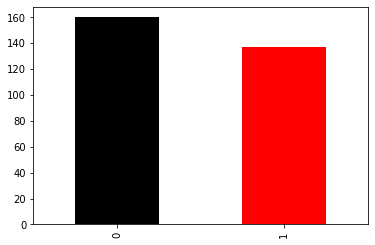

In [ ]:
df["condition"].value_counts().plot(kind="bar", color=["black","red"]);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
df.isna().sum()
# no missing values

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [ ]:
df["thalach"].value_counts()

162    11
163     9
160     9
152     8
172     7
       ..
192     1
202     1
167     1
97      1
195     1
Name: thalach, Length: 91, dtype: int64

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


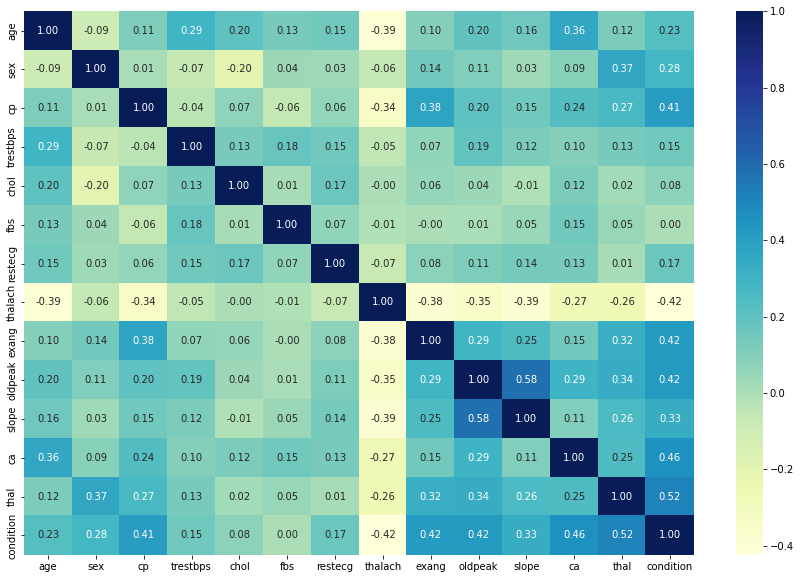

In [ ]:
# Correlation matrix inside heatmap

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 fmt =".2f",
                 cmap = "YlGnBu")

# Notes
"""
Greatest positive corrlation w/ heart disease: cp, thalach, slop
Greastest negative correlation w/ heart disease: exang, oldpeak, ca
""";

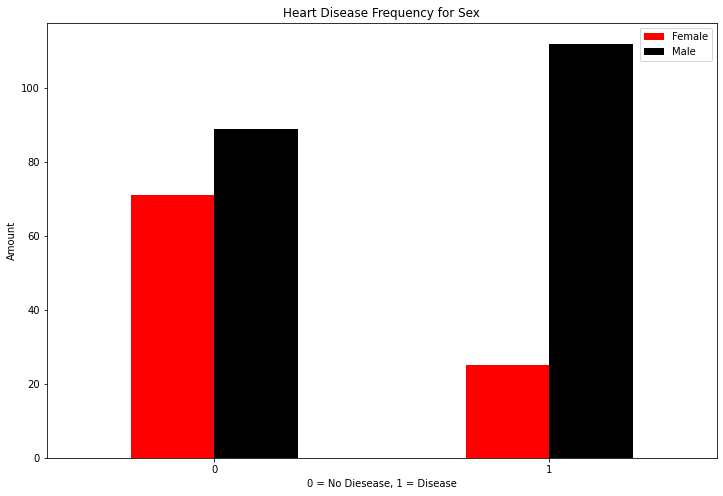

In [ ]:
# Create a plot of crosstab
pd.crosstab(df.condition, df.sex).plot(kind="bar",
                                    figsize=(12, 8),
                                    color=["red", "black"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

# Notes

"""
Data is biased to have more men w/ heart disaese vs no heart diesase than women
""";

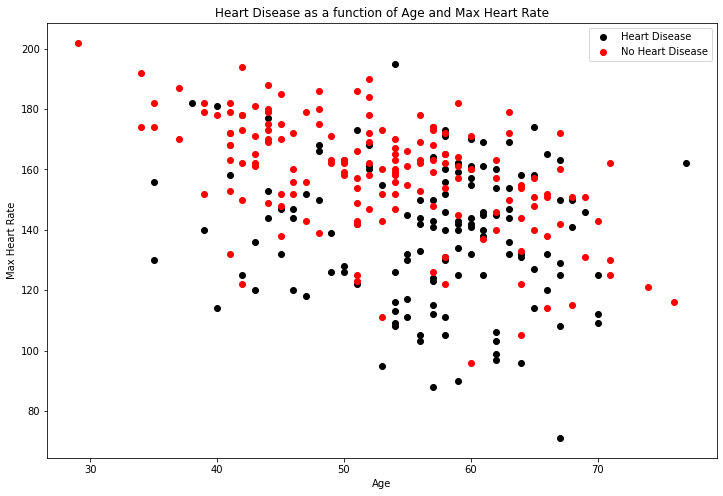

In [ ]:
# Age and Max Heart Rate


plt.figure(figsize=(12, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.condition==1],
            df.thalach[df.condition==1],
            c="black")

# Scatter with negative examples
plt.scatter(df.age[df.condition==0],
            df.thalach[df.condition==0],
            c="red")

# Add some helpful info
plt.title("Heart Disease as a function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease", "No Heart Disease"])

# Notes
"""
Results appear similar for heart disease/no heart disase.
Max heart rate decerases with age for both situaitons.
""";

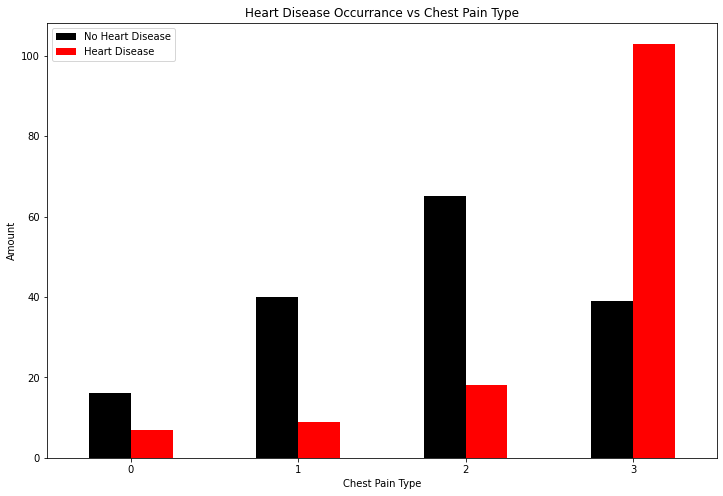

In [ ]:
# Heart disease as a function of chest pain

pd.crosstab(df.cp, df.condition).plot(kind="bar",
                                   figsize=(12, 8),
                                   color=["black", "red"])

# Add some communication
plt.title("Heart Disease Occurrance vs Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation=0);

# Notes
"""
Greater chest pains are associated with heart disease
""";

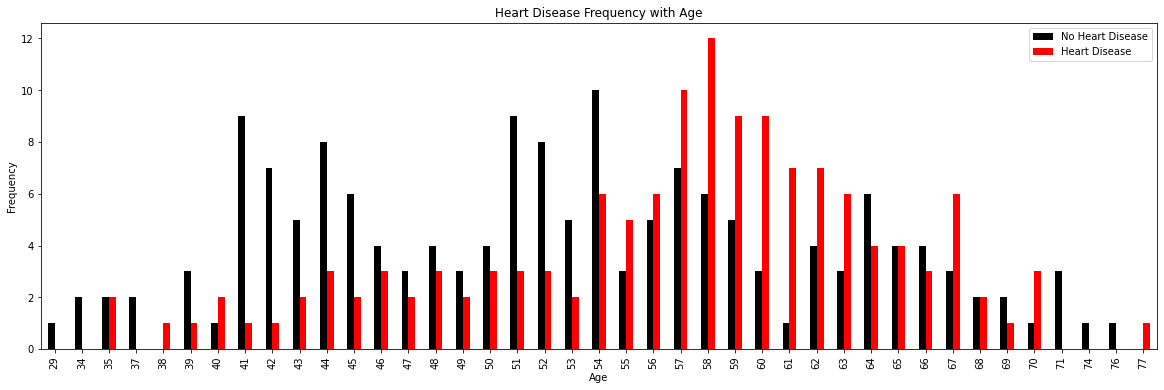

In [ ]:
# Heart disease frequency with age
pd.crosstab(df.age,df.condition).plot(kind="bar",
                                      figsize=(20,6),
                                      color=["black", "red"])
plt.title('Heart Disease Frequency with Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

## 5 Modeling Data

In [ ]:
# Splitting data into X and y

X = df.drop("condition", axis=1)
y = df["condition"]

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [ ]:
y

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64

In [ ]:
# Split data into train and test sets
np.random.seed(1)

#Splits

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
159,68,1,3,144,193,1,0,141,0,3.4,1,2,2
107,54,1,2,125,273,0,2,152,0,0.5,2,1,0
219,58,0,3,170,225,1,2,146,1,2.8,1,2,1
217,58,1,3,146,218,0,0,105,0,2.0,1,1,2
39,56,1,1,130,221,0,2,163,0,0.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,60,1,3,117,230,1,0,160,1,1.4,0,2,2
255,52,1,3,128,255,0,0,161,1,0.0,0,1,2
72,76,0,2,140,197,0,1,116,0,1.1,1,0,0
235,56,1,3,130,283,1,2,103,1,1.6,2,0,2


In [ ]:
y_train

159    1
107    0
219    1
217    1
39     0
      ..
203    1
255    1
72     0
235    1
37     0
Name: condition, Length: 237, dtype: int64

3 models to test for best accuracy
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [ ]:
# Models in a dictionary for simplicity

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier()}

# Funtion to train and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models : a dict of different sci-kit learning models
    X_train = training data
    X_test = test data
    y_train = training labels
    y_test = test labels
    '''
    
    # Set Random Seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
        

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

C:\Users\Chris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.75,
 'KNN': 0.5666666666666667,
 'Random Forest Classifier': 0.7}

### Initial Model Comparison

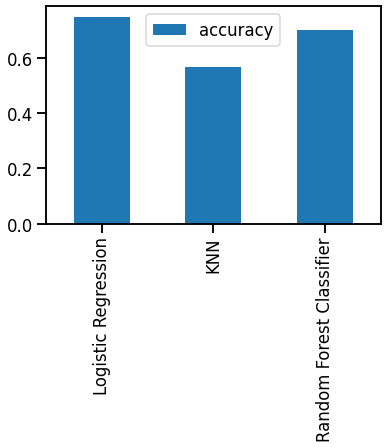

In [ ]:
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
model_comparison.T.plot.bar();

### Hyperparameter Tuning

In [ ]:
# KNN tuning

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# KNN instance setup
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

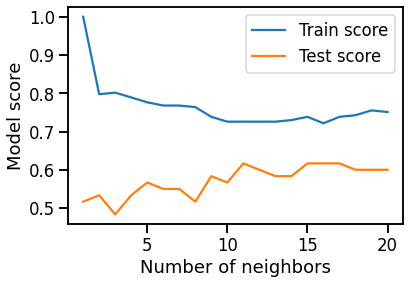

In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

In [ ]:
# Create hyperparamater grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4,4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
# Tune Logisitic Regression 
np.random.seed(42)

# Set up random hyperparamater search for logistic regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search for model logisticregression

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.score(X_test, y_test)

#Comment: tuned looks just as good as out-of-the-box value

0.7333333333333333

In [ ]:
# RandomForest tuning

np.random.seed(42)

# Set up random hyperpameter search

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv = 5,
                           n_iter=20,
                           verbose = True)

# Fit random hyperparamter search for RandomForestClassifier()

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [ ]:
rs_rf.score(X_test, y_test)

0.7333333333333333

In [ ]:
# different hyperparameters for our logisticregression model

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Set up grid hyperparamater search for logisitic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv = 5,
                          verbose=True)

# Fit grid hyperparamater search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
# best aparm

gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [ ]:
# eval the grid search model

gs_log_reg.score(X_test,y_test)

0.7333333333333333

### Evaluate tuned machine learning classifiers beyond accuracy
* ROC
* confusion matrix
* classification report
* precision
* recall
* f1-score

In [ ]:
# Make predictions w/ tuned model

y_predict = gs_log_reg.predict(X_test)
y_predict

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

C:\Users\Chris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


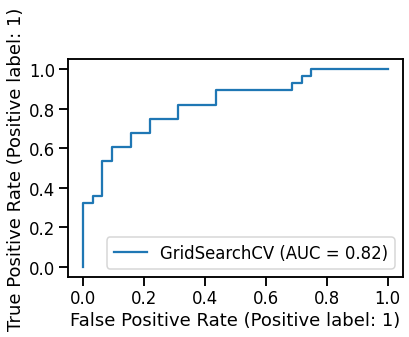

In [ ]:
plot_roc_curve(gs_log_reg, X_test, y_test);

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_test,y_predict))

[[23  9]
 [ 7 21]]


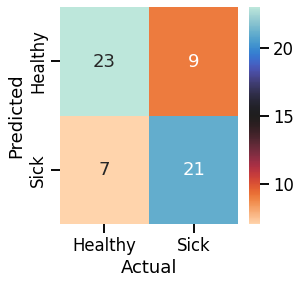

In [ ]:
sns.set_context("talk")
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_predict), 
             annot=True, 
             xticklabels=["Healthy", "Sick"], 
             yticklabels=["Healthy", "Sick"], 
             fmt="g", 
             cmap="icefire_r")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



### Calculate evaluation metrics using cross-validation



In [ ]:
# Check best hyperparams

gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [ ]:
# Create a new classifier w/ best parameters

clf = LogisticRegression(C=0.20433597178569418,
                         solver = "liblinear")

In [ ]:
# Cross-validated accuracy

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8286440677966102

In [ ]:
# Cross-validated precision

cv_pres = cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="precision")

cv_pres = np.mean(cv_pres)
cv_pres

0.8807576509511993

In [ ]:
# Cross-validated recall

cv_recall = cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.7547619047619047

In [ ]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.7761219357219767

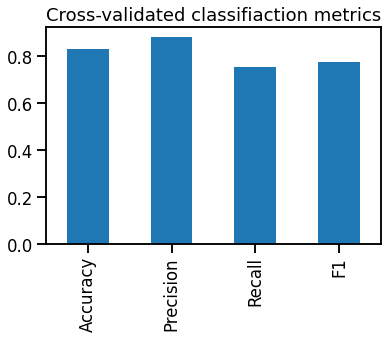

In [ ]:
# Vizualize cross-validated metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_pres,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classifiaction metrics", legend=False);

### Most important features for the prediction of heart disease

Which features contributed most to the outcomes of the model and how do they contribute?

In [ ]:
# Fit an instance of Logistic Regression

clf = LogisticRegression(C=0.20433597178569418,
                         solver = "liblinear")

clf.fit(X_train,y_train);

In [ ]:
# Check coef_

clf.coef_

array([[-0.02413903,  0.83802339,  0.29494936,  0.02092897,  0.00419437,
        -0.27530411,  0.26739054, -0.03883295,  0.37806397,  0.44475864,
         0.16442336,  0.9047174 ,  0.76318573]])

In [ ]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.024139031074873047,
 'sex': 0.8380233879628175,
 'cp': 0.2949493555950599,
 'trestbps': 0.020928966359026625,
 'chol': 0.004194365339634518,
 'fbs': -0.2753041084727004,
 'restecg': 0.2673905353009162,
 'thalach': -0.038832948797285535,
 'exang': 0.37806397122170704,
 'oldpeak': 0.4447586397949669,
 'slope': 0.1644233636016323,
 'ca': 0.9047173957256477,
 'thal': 0.7631857255374755}

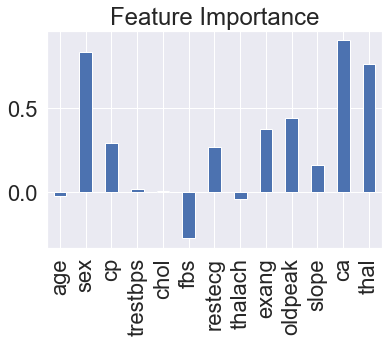

In [ ]:
# Vizualize most important features
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

## Deep Learning Model: A Sanity Check

This model will serve as a quick sanity check to the previous machine learning models.
A simple deep learning model will be employed on the data to see if the results are similar to the aforementioned cross-validated accuracy.


In [ ]:
import tensorflow as tf



# Set random seed
tf.random.set_seed(1)

# Simple model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer
])

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
model_1.fit(X_train, y_train, epochs=500, verbose=0)


In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

2/2 [==============================] - 0s 6ms/step - loss: 0.3494 - accuracy: 0.8500
Model loss on the test set: 0.349394828081131
Model accuracy on the test set: 85.00%


### 6. Conclusions

Achieved an accuracy of close to 85% with logistic regression that was cross-validated.  A simple deep learning model was also employed to also obtain an accuracy of 85%.  The sex (being male), Thalassemia diagnosis, and the outcome of fluoroscopy characterization are the biggest predictors for heart disease in a patient.

Possible ways to improve improve model:
    
    1. Collect more data (<300 pts): Data is heavily skewed w/ older males having heart disease and having a greater sample set might improve the model and outcome.
    2. Improve current model with even more fine tuning; this is highly unlikely to improve given the results of our deep learning model
